In [1]:
import qcodes as qc
import numpy as np
from time import sleep

import sweep 
from sweep.sweep_load import pload1d
from barreralabdrivers.utils.param_utils import paramp
from cappy.config import DUAL_HEMT_STATION_CONFIG, DATA2_PATH
from cappy.balancer import Balancer

from qcodes.validators import Numbers, Callable, Validator
from qcodes.parameters import Parameter, ScaledParameter
import datetime
from cappy.config import DATA_PATH
from cappy.opener import Opener as Open

In [2]:
qc.Instrument.close_all()   # in case of existing connecitons
container = qc.Station(config_file=str(DUAL_HEMT_STATION_CONFIG))

acdac = container.load_instrument("acdac")
dcdac = container.load_instrument("dcdac")
yoko = container.load_instrument("yoko")
keithley = container.load_instrument("keithley")
li1 = container.load_instrument("lockin")

print(100 * "-")
print(f"{datetime.datetime.now().strftime('%c')}")

Connected to: BARRERA ACDAC02 (serial:AD9106, firmware:2.00) in 3.15s
Connected to: BARRERA DCDAC01 (serial:AD5764, firmware:2.00) in 3.05s
Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.05s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.01s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.07s
----------------------------------------------------------------------------------------------------
Fri Mar  7 12:19:23 2025


In [5]:
# Applied AC Voltages
Vref = acdac.ch1
V1pf = acdac.ch2
Vlref = acdac.ch3

# Applied DC Voltages
Vdd = yoko.channel1.voltage             # drives drain to source current across HEMT_A 
Vgamp = dcdac.channel1.voltage          # drives drain to source current across HEMT_R draining at HEMT_A gate 
Vgres = yoko.channel2.voltage           # gate voltage on HEMT_R 


# validators
non_positive_validator = Numbers(min_value=-2 , max_value=0)      
vg_max_validator = Numbers(min_value = -2, max_value=Vgamp.get())

# Vgamp < 0 and Vgres < Vgramp at all times 
Vgamp.add_validator(non_positive_validator)  
Vgres.add_validator(vg_max_validator)

# Measured Quantities 
Vdsdc = keithley.amplitude
Vdsac_R = li1.R
Vdsac_P = li1.P

In [6]:
yoko.channel1.output(1)
yoko.channel2.output(1)

In [11]:
Vdd(0.1)

In [ ]:
Vgres(-1.4)

In [42]:
Vgamp(-0.6)

In [19]:
FREQ = 10000

acdac.frequency(FREQ)

In [21]:
V1pf.voltage(50)

In [18]:
Vlref.voltage(400)

In [ ]:
dep = [Vdsac_R, Vdsac_P]
indep = [acdac.frequency]

mc={}

for param in indep + dep:
    mc[param.full_name] = param.label

s = sweep.Station(basedir=DATA2_PATH, measurement_config=mc)

for param in indep + dep:
    s.fp(param)

for param in dep:
    s.plot(acdac.frequency, param)

2025-02-19 15:54:26,290 [INFO] Starting sweep with ID 34
2025-02-19 15:54:26,290 [INFO] Minimum duration 0h 1m 40s


  0%|          | 0/100 [00:00<?, ?it/s]

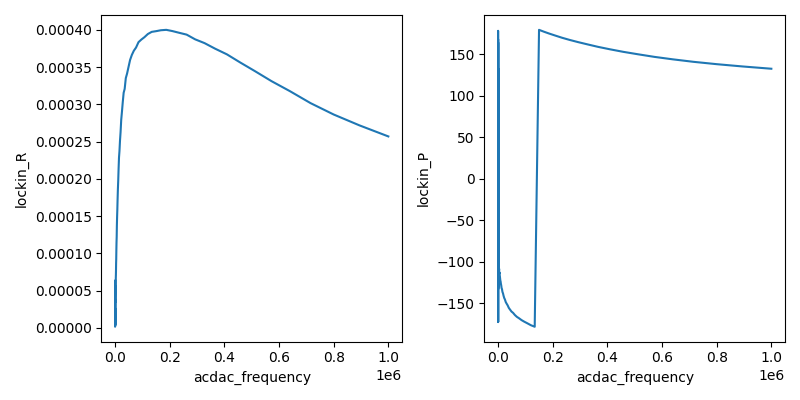

2025-02-19 15:56:10,988 [INFO] Completed in 0h 1m 44s
2025-02-19 15:56:10,988 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data2\34\data.tsv.gz


In [37]:
START = 1.2
STOP = 6
SAMPLES = 100
INT_TIME = 1

SAMPLES = 10**(np.linspace(start= START, stop = STOP, num = SAMPLES))
res = s.sweep(acdac.frequency, SAMPLES, delay=INT_TIME)


In [65]:
Vgamp(-0.6)


2025-02-20 09:22:02,562 [INFO] Starting sweep with ID 37
2025-02-20 09:22:02,564 [INFO] Minimum duration 0h 1m 40s


  0%|          | 0/100 [00:00<?, ?it/s]

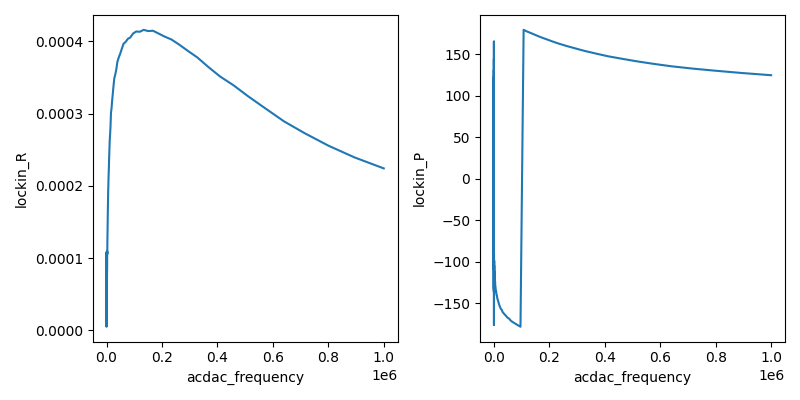

2025-02-20 09:23:47,729 [INFO] Completed in 0h 1m 44s
2025-02-20 09:23:47,729 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data2\37\data.tsv.gz


In [86]:
s.reset()
res = s.sweep(acdac.frequency, SAMPLES, delay=INT_TIME)


In [ ]:
opened = Open(DATA2_PATH, 34)
data = opened.getdata()

opened.plotcfg(xscale = 'log')
opened.plot(data, ["acdac_frequency", "lockin_R", "lockin_P"])


C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\Data\data2 34

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'acdac_frequency', 'lockin_R', 'lockin_P'])


In [ ]:
opened = Open(DATA2_PATH, 36)
data = opened.getdata()
opened.plotcfg(xscale = 'log')
opened.plot(data, ['acdac_frequency', 'lockin_R','lockin_P'])


C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data2 36

Data keys are: dict_keys(['measurement_config', 'xs', 'time', 'acdac_frequency', 'lockin_R', 'lockin_P'])


In [87]:
Vgamp()
Vgres()

-1.506

In [91]:
Vgamp()

-0.599994

Ramping down voltages 

In [93]:
V1pf.voltage(0)

In [94]:
Vgres(-0.8)

In [95]:
Vgamp(0)

In [96]:
Vgres(0)

In [97]:
Vdd(0)

In [98]:
acdac.print_readable_snapshot()

acdac:
	parameter   value
--------------------------------------------------------------------------------
IDN          :	{'vendor': 'BARRERA', 'model': 'ACDAC02', 'serial': 'AD9106', ...
display_mode :	REMOTE 
 rror        :	0 - No Error
frequency    :	1e+06 (Hz)
timeout      :	5 (s)
acdac_ch1:
	parameter value
--------------------------------------------------------------------------------
phase   :	0 (deg)
voltage :	0 (mV)
acdac_ch2:
	parameter value
--------------------------------------------------------------------------------
phase   :	0 (deg)
voltage :	0 (mV)
acdac_ch3:
	parameter value
--------------------------------------------------------------------------------
phase   :	0 (deg)
voltage :	400 (mV)
acdac_ch4:
	parameter value
--------------------------------------------------------------------------------
phase   :	0 (deg)
voltage :	0 (mV)


In [99]:
acdac.ch3.voltage(0)